# SciPy - Scientific Python

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling sytems such as MATLAB, IDL, Octave, R-Lab, and SciLab.


## SciPy Organization

* cluster Clustering algorithms
* constants Physical and mathematical constants
* fftpack Fast Fourier Transform routines
* integrate Integration and ordinary differential equation solvers
* interpolate Interpolation and smoothing splines
* io Input and Output
* linalg Linear algebra
* ndimage N-dimensional image processing
* odr Orthogonal distance regression
* optimize Optimization and root-finding routines
* signal Signal processing
* sparse Sparse matrices and associated routines
* spatial Spatial data structures and algorithms
* special Special functions
* stats Statistical distributions and functions
* weave C/C++ integration

In [1]:
from scipy import linalg, optimize

In [2]:
import scipy as sp
sp.info(optimize.fmin)

 fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None,
      full_output=0, disp=1, retall=0, callback=None)

Minimize a function using the downhill simplex algorithm.

This algorithm only uses function values, not derivatives or second
derivatives.

Parameters
----------
func : callable func(x,*args)
    The objective function to be minimized.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to func, i.e. ``f(x,*args)``.
callback : callable, optional
    Called after each iteration, as callback(xk), where xk is the
    current parameter vector.
xtol : float, optional
    Relative error in xopt acceptable for convergence.
ftol : number, optional
    Relative error in func(xopt) acceptable for convergence.
maxiter : int, optional
    Maximum number of iterations to perform.
maxfun : number, optional
    Maximum number of function evaluations to make.
full_output : bool, optional
    Set to True if fopt and warnflag outputs are desi

## Linear algebra

In [3]:
import numpy as np
from scipy import linalg
arr = np.array([[1, 2],   # square matrix
                [3, 4]])
print linalg.det(arr)     # determinant
print linalg.inv(arr)     # inversion

-2.0
[[-2.   1. ]
 [ 1.5 -0.5]]


In [4]:
arr = np.array([[3, 2],   # singluar matrix
                [6, 4]])
print linalg.det(arr)

0.0


In [5]:
print linalg.inv(arr)     # inversion of singular matrix

LinAlgError: singular matrix

## Optimization

In [6]:
import numpy as np
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt

#### Define function to analyze

In [7]:
def f(x):
    return x**2 + 10*np.sin(x)

#### Find roots and minima

In [8]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)
root = optimize.fsolve(f, 1)  # our initial guess is 1
root2 = optimize.fsolve(f, -2.5)
print xmin_global, xmin_local, root, root2

[-1.30641113] 3.8374671195 [ 0.] [-2.47948183]


#### Create data and add random noise 

In [9]:
xdata = np.linspace(-10, 10, num=50)
np.random.seed(1234)
ydata = f(xdata) + np.random.randn(xdata.size) * 1

#### Define function for fitting the synthetic data

In [10]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

#### Curve fit

In [11]:
guess = [.1, .1]
[a, b], params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
print a, b

1.0005005573 9.75762780724


####  Plot

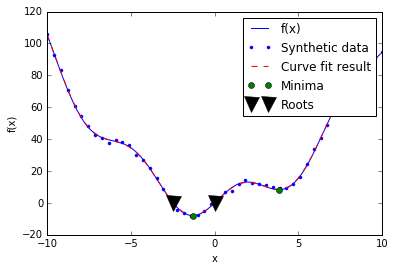

In [12]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x), 'b-', label="f(x)")
plt.plot(xdata, ydata, '.', label="Synthetic data")
plt.plot(x, f2(x, a, b), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
plt.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
plt.plot(roots, f(roots), 'kv', label="Roots", ms=15)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

## Interpolation

#### Create synthetic data close to a sine function with random noise

In [13]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * .3
measures = np.sin(2 * np.pi * measured_time) + noise

#### Perform interpolation

In [14]:
from scipy.interpolate import interp1d
computed_time = np.linspace(0, 1, 50)             # X - values

linear_interp = interp1d(measured_time,
                         measures)                # create interpolator
linear_results = linear_interp(computed_time)     # use interpolator

cubic_interp = interp1d(measured_time,
                        measures,
                        kind='cubic')             # create interpolator
cubic_results = cubic_interp(computed_time)       # use interpolator

#### Plot

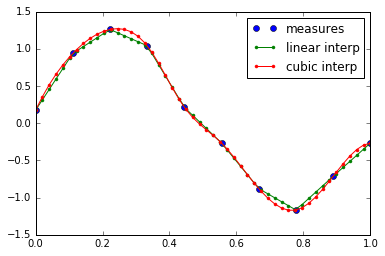

In [15]:
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(computed_time, linear_results, '.-', label='linear interp')
plt.plot(computed_time, cubic_results, '.-', label='cubic interp')
plt.legend()
plt.show()

## Image processing

In [16]:
from scipy import ndimage
from scipy import misc

#### Load sample image

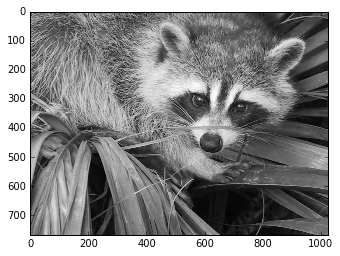

In [18]:
face = misc.face()[:,:,0]
plt.imshow(face, cmap='gray')
plt.show()

#### Perform distortion of the sample image 

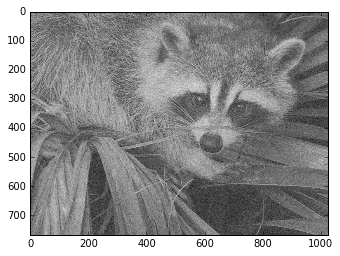

In [19]:
noisy_face = face + face.std()*0.5*np.random.standard_normal(face.shape)
plt.imshow(noisy_face, cmap='gray')

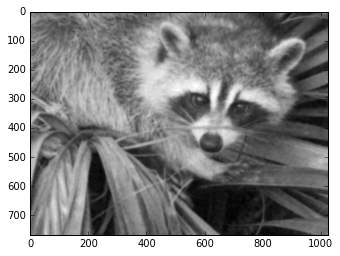

In [20]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
plt.imshow(blurred_face, cmap='gray')

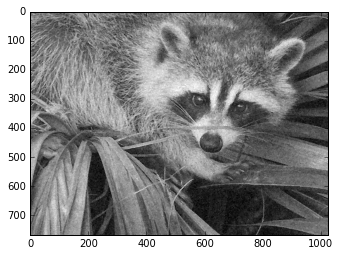

In [21]:
median_face = ndimage.median_filter(noisy_face, size=5)
plt.imshow(median_face, cmap='gray')

#### Improve plurred image and plot

(-0.5, 1023.5, 767.5, -0.5)

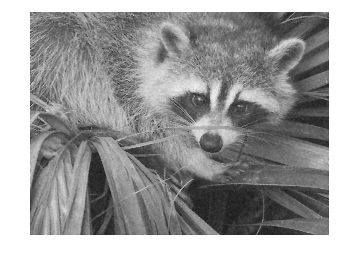

In [22]:
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5,5))
plt.imshow(wiener_face, cmap='gray')
plt.axis('off')

## Measurements on images

#### Let us first generate a nice synthetic binary image.

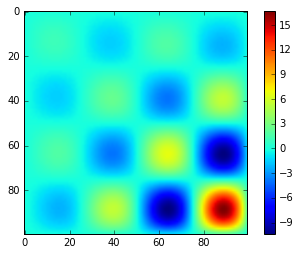

In [23]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.)*np.sin(2*np.pi*y/50.)*(1+x*y/50.**2)**2
plt.imshow(sig);plt.colorbar()

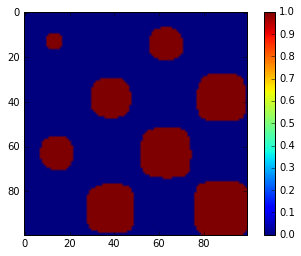

In [24]:
mask = sig > 1
plt.imshow(mask);plt.colorbar()

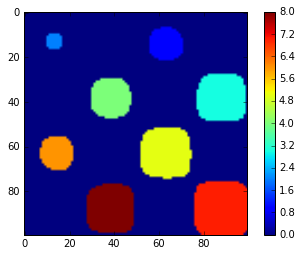

In [25]:
labels, nb = ndimage.label(mask)
plt.imshow(labels); plt.colorbar()

#### Find areas of the identified zones

In [26]:
label_ids = np.unique(labels)
print label_ids
print ndimage.sum(mask, labels, label_ids)

[0 1 2 3 4 5 6 7 8]
[   0.  190.   45.  424.  278.  459.  190.  549.  424.]


#### Find maximum value for each object

In [27]:
print ndimage.maximum(sig, labels, xrange(1, labels.max()+1))

[  1.80238238   1.13527605   5.51954079   2.49611818   6.71673619
   1.80238238  16.76547217   5.51954079]


#### Extract idetified object from original matrix

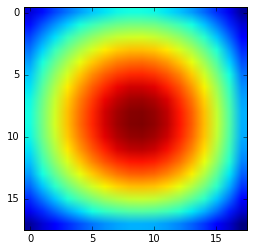

In [28]:
sl = ndimage.find_objects(labels==4)
plt.imshow(sig[sl[0]])

# Exercises

### 1. Analyze the function:
\begin{equation*} y = 0.2 x^2 + 10 cos(x) \end{equation*}

1. Find roots of the function
1. Find local minimum of the function

### 2. Fit 2nd order polynom to noisy data:
` x = np.linspace(-10, 10, 20) `


` y = 2 * x ** 2 + np.random.randn(x.size) * 10 `

### 3. Find eges on the 'lena' image (use ndimage.sobel)
` from scipy import misc `


` lena = misc.lena() `
